# Julia Notebook

## 1. Version information and Instantiate Packages

In [1]:
versioninfo()

Julia Version 1.6.2
Commit 1b93d53fc4 (2021-07-14 15:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.7.0)
  CPU: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, skylake)


In [2]:
import Pkg; Pkg.activate(pwd() * "/../../"); Pkg.instantiate();

  Activating environment at `~/Documents/Github/projects/rdpg/Project.toml`
Precompiling project...
  ✓ Plots
  1 dependency successfully precompiled in 46 seconds (157 already precompiled)


In [3]:
using Plots, Random, Distributions, Pipe, LinearAlgebra
using Ripserer, PersistenceDiagramsBase

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342


## 2. Function to generate sample points

In [4]:
function randCircle(;n = 100, σ = 0.05)
    return @pipe rand(Uniform(-π, π), n) .|> [cos(_), sin(_)] |> _ .* rand(Normal(1, σ), n) |> Tuple.(eachcol(_)...)
end

randCircle (generic function with 1 method)

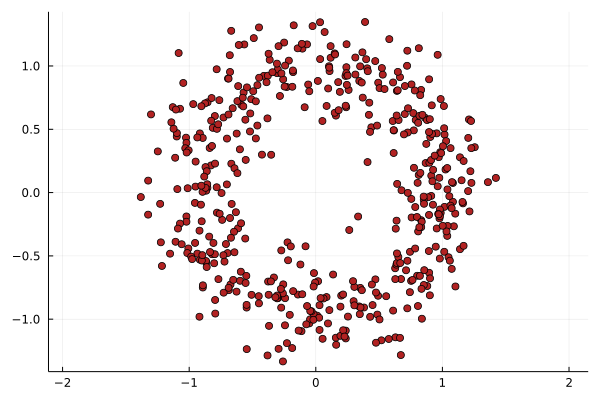

In [5]:
Random.seed!(2021)
X = randCircle(; n = 500, σ = 0.2)
scatter(X, ratio = 1, label = "", c = :firebrick)

 13.821738 seconds (15.61 M allocations: 937.617 MiB, 4.85% gc time)


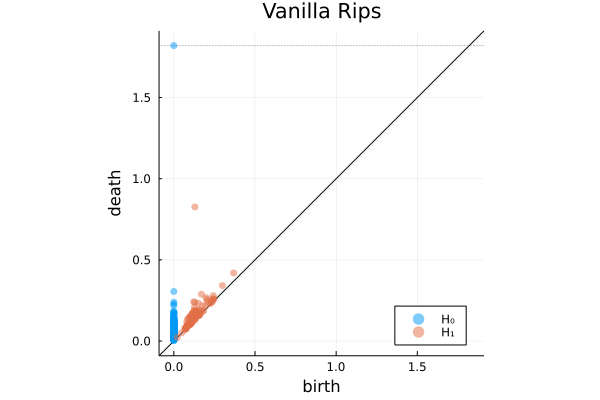

In [6]:
@time D1 = ripserer(X)
plot(D1, title = "Vanilla Rips")

## 3. Compute three different types of Persistence diagrams

  4.622794 seconds (6.15 M allocations: 384.817 MiB, 2.38% gc time)


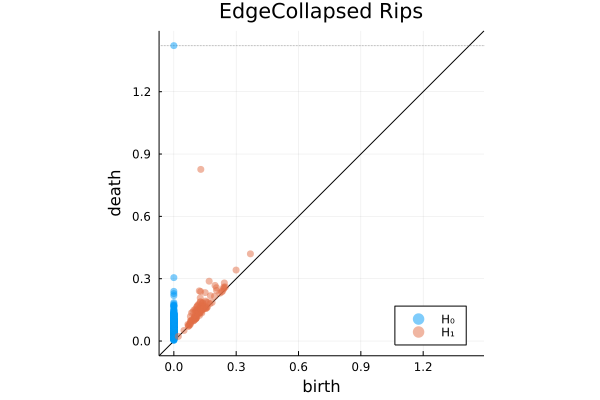

In [7]:
@time D2 = ripserer(EdgeCollapsedRips(X))
plot(D2, title = "EdgeCollapsed Rips")

  6.984889 seconds (10.95 M allocations: 650.310 MiB, 4.79% gc time)


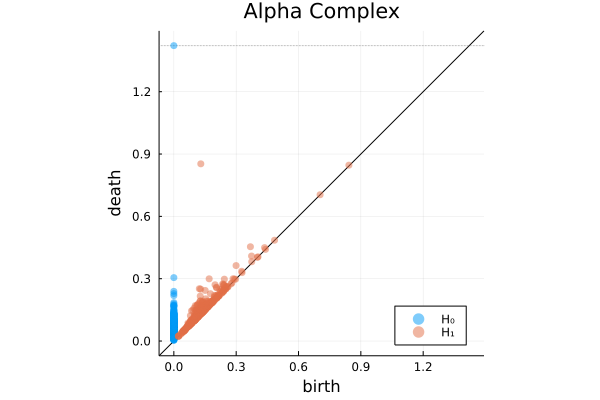

In [8]:
@time D_alpha = ripserer(Alpha(X))
D3 = Array{PersistenceDiagram, 1}(undef, 2)
for dim ∈ 1:2
    D3[dim] = PersistenceDiagram(D_alpha[dim].intervals,
                (; D_alpha[dim].meta..., threshold = D2[1].meta.threshold) )
end
plot(D3, title = "Alpha Complex")

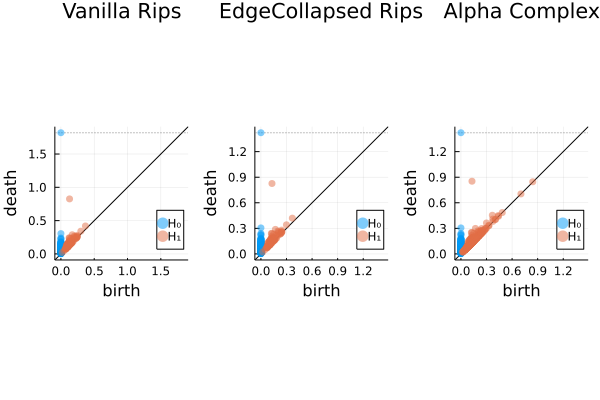

In [9]:
plot(
    plot(D1, title = "Vanilla Rips"),
    plot(D2, title = "EdgeCollapsed Rips"),
    plot(D3, title = "Alpha Complex"),
    layout = (1, 3)
)